# Author: ddukic

In [1]:
import wandb
import pandas as pd
import sys
import json
from statistics import mean, stdev
sys.path.append("../")
from result_utils import * 
%matplotlib inline

api = wandb.Api()

def fetch_run_summary(run_url):
    run_key = run_url.split("/")[-1]
    return api.run("ddukic/oee-paper/" + run_key).summary

In [2]:
results_seed_42 = json.load(open("seed_42.json", "r"))
results_seed_43 = json.load(open("seed_43.json", "r"))
results_seed_44 = json.load(open("seed_44.json", "r"))

In [3]:
temp = [[id for _, id in v.items()] for _, v in results_seed_42.items()]
wandb_keys = []

for x in temp:
    for k in x:
        wandb_keys.append(k)

print("all unique:", len(wandb_keys) == len(set(wandb_keys)))

all unique: True


In [4]:
results_check_all_equal = {
    k: {
        setting: extract_name(run_42).replace("SEED=42", "")
        == extract_name(run_43).replace("SEED=43", "")
        == extract_name(run_44).replace("SEED=44", "")
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}


In [3]:
results_target_f1_table_data_mean = {
    k: {
        setting: format(
            round(
                mean(
                    [
                        extract_target_performance(fetch_run_summary(run_42), k, "f1"),
                        extract_target_performance(fetch_run_summary(run_43), k, "f1"),
                        extract_target_performance(fetch_run_summary(run_44), k, "f1"),
                    ]
                ),
                3,
            ),
            ".3f",
        )
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

results_target_f1_table_data_std = {
    k: {
        setting: format(
            round(
                stdev(
                    [
                        extract_target_performance(fetch_run_summary(run_42), k, "f1"),
                        extract_target_performance(fetch_run_summary(run_43), k, "f1"),
                        extract_target_performance(fetch_run_summary(run_44), k, "f1"),
                    ]
                ),
                3,
            ),
            ".3f",
        )
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

results_target_f1_plot_data = {
    k: {
        setting: mean(
            [
                extract_target_performance(fetch_run_summary(run_42), k, "f1"),
                extract_target_performance(fetch_run_summary(run_43), k, "f1"),
                extract_target_performance(fetch_run_summary(run_44), k, "f1"),
            ]
        )
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

In [11]:
df_f1 = pd.DataFrame.from_dict(results_target_f1_table_data_mean, orient="index")
print(df_f1.to_latex().replace("llll", "lrrr"))

\begin{tabular}{lrrr}
\toprule
{} & vanilla & implicit\_multitask & two\_head\_multitask \\
\midrule
0\_shot\_pretrained\_on\_source         &   0.234 &              0.237 &              0.240 \\
0\_shot\_from\_roberta                 &   0.019 &              0.029 &              0.024 \\
joint\_5\_shot\_from\_roberta           &   0.246 &              0.250 &              0.256 \\
joint\_10\_shot\_from\_roberta          &   0.251 &              0.253 &              0.262 \\
joint\_50\_shot\_from\_roberta          &   0.265 &              0.268 &              0.283 \\
joint\_100\_shot\_from\_roberta         &   0.286 &              0.286 &              0.310 \\
joint\_250\_shot\_from\_roberta         &   0.332 &              0.330 &              0.357 \\
joint\_500\_shot\_from\_roberta         &   0.382 &              0.378 &              0.398 \\
joint\_5\_shot\_pretrained\_on\_source   &   0.248 &              0.248 &              0.254 \\
joint\_10\_shot\_pretrained\_on\_source  &  

/tmp/ipykernel_60078/3942959778.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_f1.to_latex().replace("llll", "lrrr"))


In [4]:
df_f1 = pd.DataFrame.from_dict(results_target_f1_table_data_std, orient="index")
print(df_f1.to_latex().replace("llll", "lrrr"))

\begin{tabular}{lrrr}
\toprule
{} & vanilla & implicit\_multitask & two\_head\_multitask \\
\midrule
0\_shot\_pretrained\_on\_source         &   0.005 &              0.003 &              0.003 \\
0\_shot\_from\_roberta                 &   0.021 &              0.025 &              0.021 \\
joint\_5\_shot\_from\_roberta           &   0.008 &              0.001 &              0.003 \\
joint\_10\_shot\_from\_roberta          &   0.003 &              0.003 &              0.006 \\
joint\_50\_shot\_from\_roberta          &   0.006 &              0.005 &              0.011 \\
joint\_100\_shot\_from\_roberta         &   0.005 &              0.002 &              0.010 \\
joint\_250\_shot\_from\_roberta         &   0.009 &              0.003 &              0.010 \\
joint\_500\_shot\_from\_roberta         &   0.013 &              0.010 &              0.006 \\
joint\_5\_shot\_pretrained\_on\_source   &   0.010 &              0.005 &              0.004 \\
joint\_10\_shot\_pretrained\_on\_source  &  

/tmp/ipykernel_88227/524380686.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_f1.to_latex().replace("llll", "lrrr"))


In [6]:
# df_pr = (
#     pd.DataFrame.from_dict(results_seed_42_target_precision_table_data, orient="index")
#     .astype(str)
#     .add("/")
#     .add(
#         pd.DataFrame.from_dict(results_seed_42_target_recall_table_data, orient="index").astype(
#             str
#         )
#     )
# )
# print(df_pr.to_latex().replace("llll", "lrrr"))

In [9]:
df_f1 = df_f1 = pd.DataFrame.from_dict(results_target_f1_plot_data, orient="index")
df_f1 = transform_df(df_f1)
df_f1.to_csv("no_mlm.csv", index=False)

/home/ddukic/oee/results/maven_to_ace/../result_utils.py:91: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(


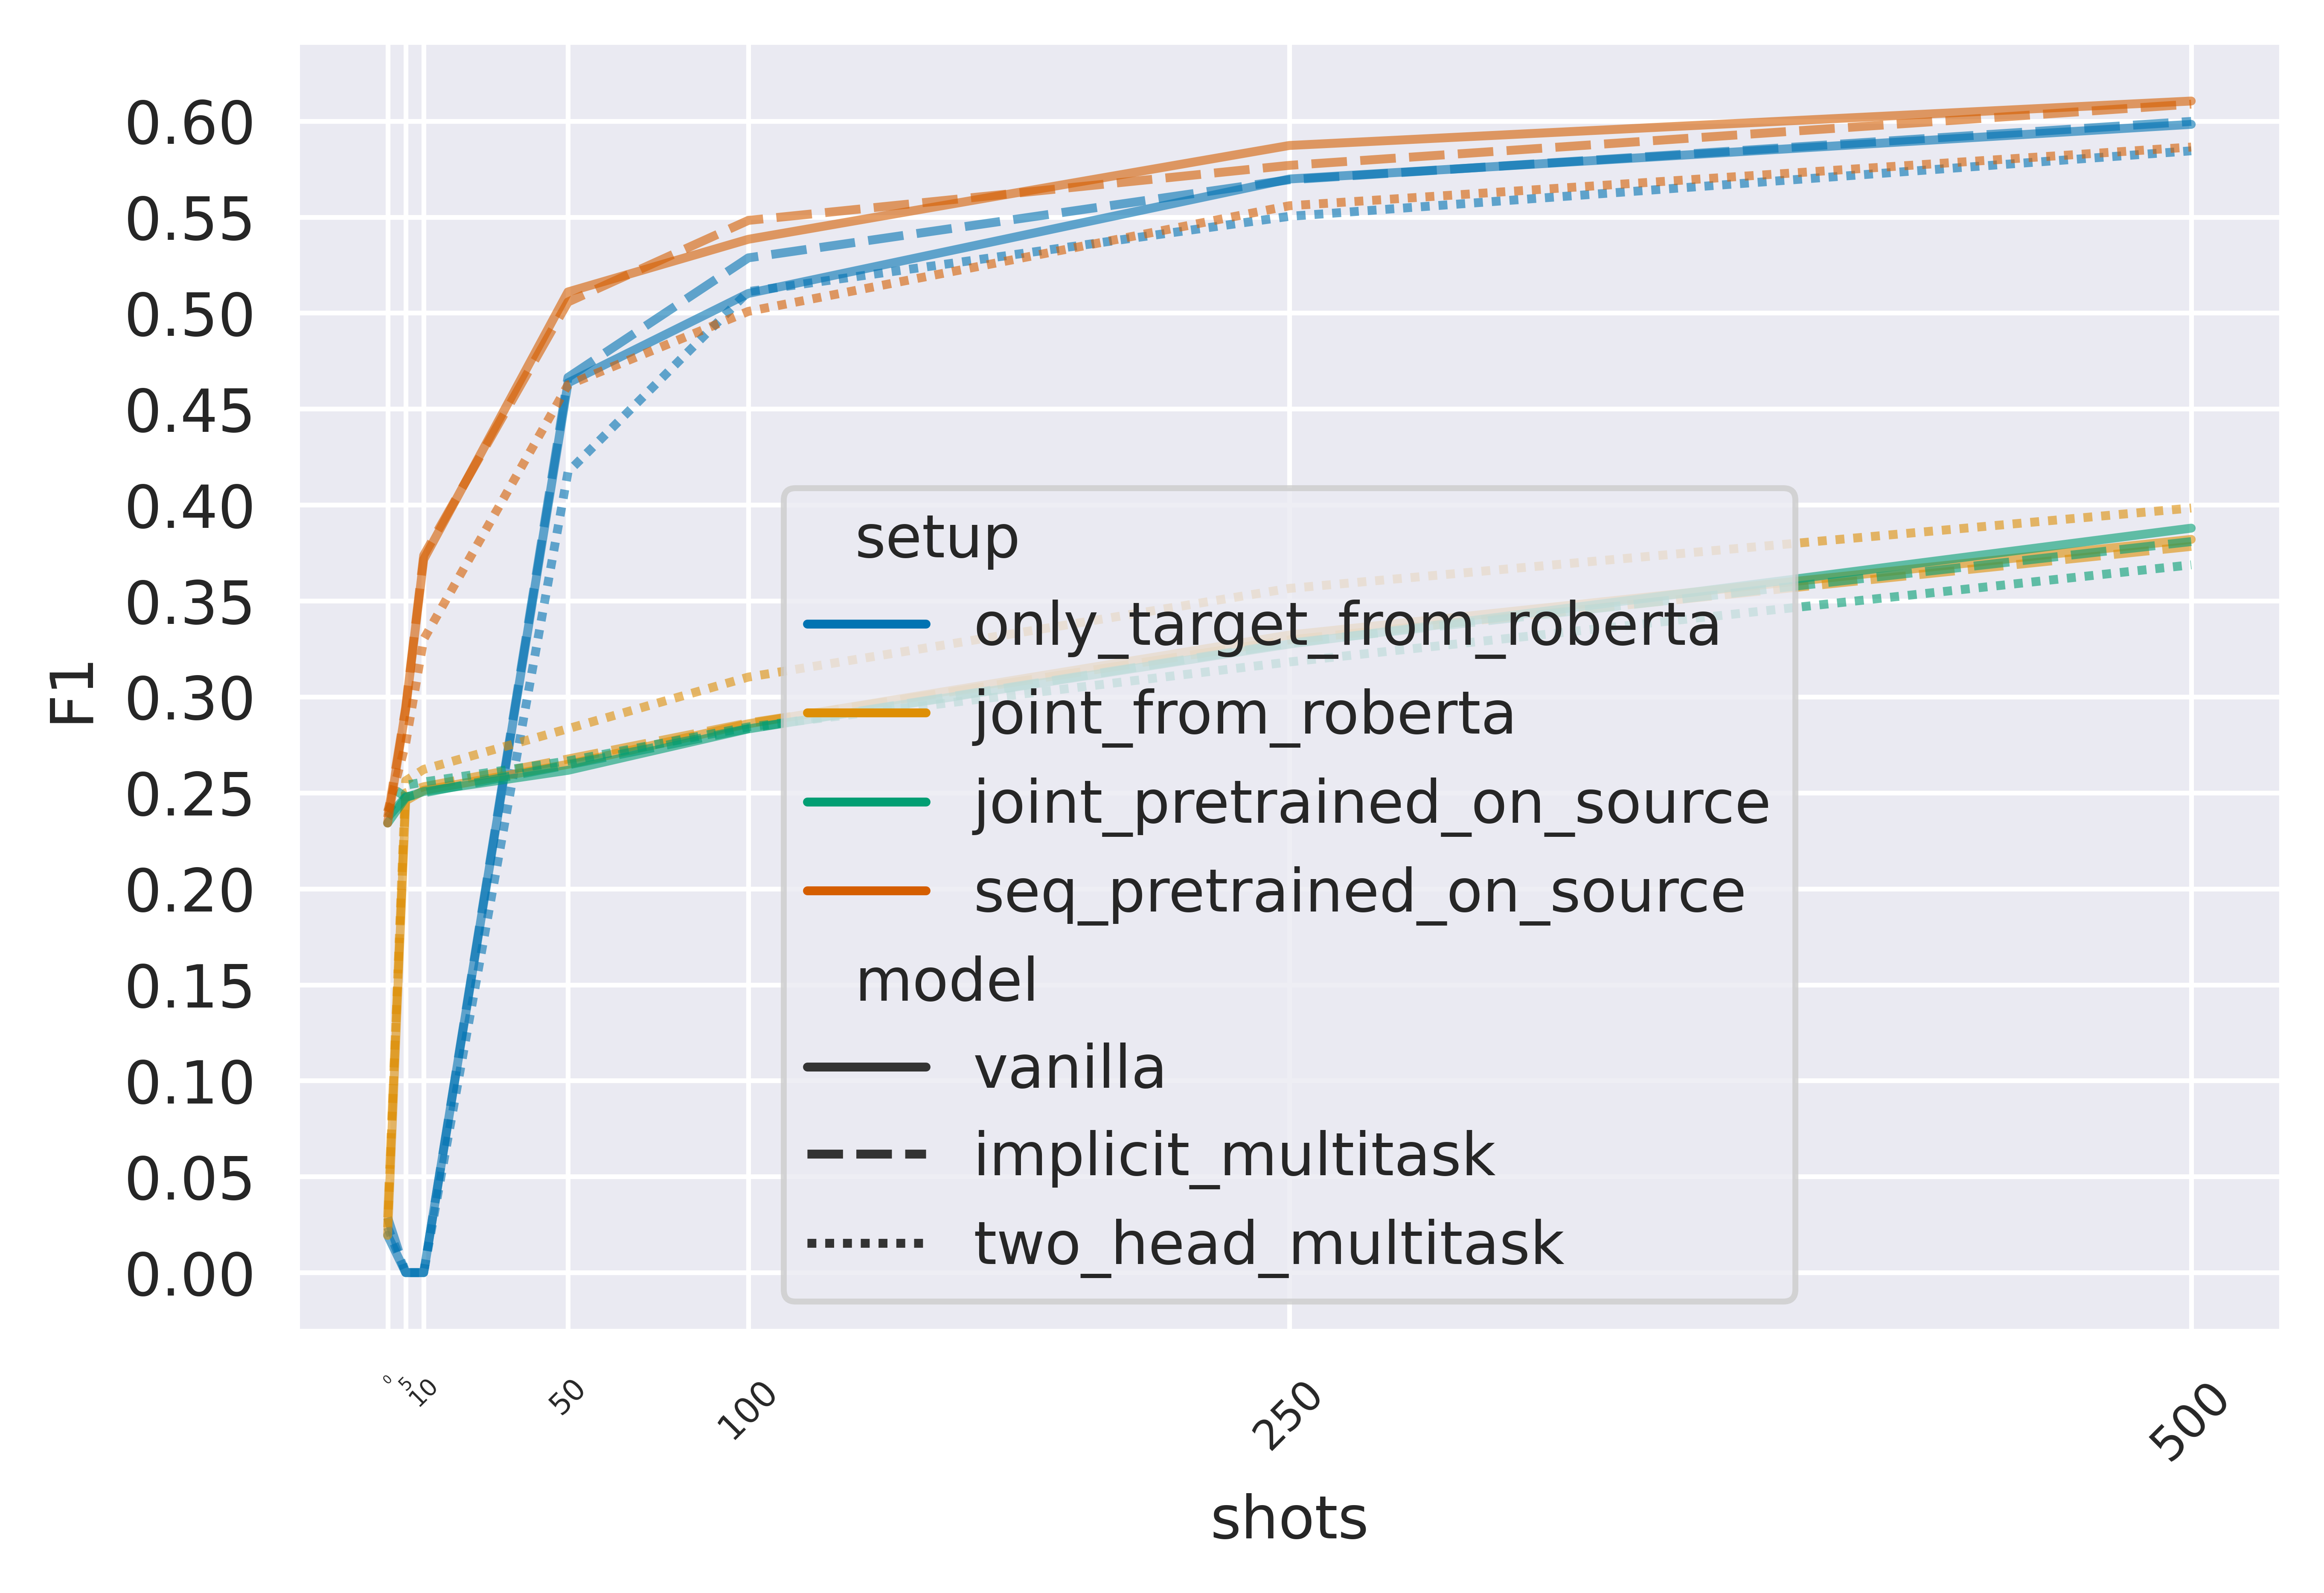

In [13]:
plot_graph(df_f1)

In [8]:
# def extract_source_performance(results, setting):
#     if setting.startswith("zero"):
#         if "test_all_metrics" in results.keys():
#             return round(
#                 results["test_all_metrics"]["identification"]["overall_f1"] * 100, 2
#             )
#         elif "test_all_metrics_trigger" in results.keys():
#             return round(
#                 results["test_all_metrics_trigger"]["identification"]["overall_f1"]
#                 * 100,
#                 2,
#             )
#         else:
#             return round(
#                 results["test_all_metrics (lr_emb=5e-05, hidden_size=10)"][
#                     "identification"
#                 ]["overall_f1"]
#                 * 100,
#                 2,
#             )
#     else:
#         if "test_all_metrics_trigger_averaged" in results.keys():
#             return round(
#                 results["test_all_metrics_trigger_averaged"]["overall_f1_averaged"]
#                 * 100,
#                 2,
#             )
#         elif "test_all_metrics_averaged" in results.keys():
#             return round(
#                 results["test_all_metrics_averaged"]["overall_f1_averaged"] * 100, 2
#             )

In [9]:
# results_seed_42_source = {
#     k: {setting: extract_source_performance(fetch_run_summary(run), k) for setting, run in v.items()}
#     for k, v in results_seed_42.items()
# }